In [46]:
import numpy as np
from sklearn import datasets
from scipy.linalg import eigh
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

In [47]:
# Generate a noisy, synthetic data set (data_points, label)
x, y = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)

In [48]:
print(x) # 2D data points

[[-0.44630065 -0.16386025]
 [ 0.33970857 -1.05143997]
 [-0.95452788 -0.36375402]
 ...
 [ 0.36169119  0.95625329]
 [ 0.04201886  1.01607405]
 [-0.12571698  0.50577466]]


In [49]:
print(x.shape)

(1500, 2)


In [50]:
print(y) # class labels

[1 0 0 ... 0 0 1]


In [51]:
print(y.shape)

(1500,)


In [52]:
def similarity_matrix(x, gamma):
    p_dist = pdist(x)
    S = squareform(p_dist)
    A = np.exp(-gamma * S)
    return A

In [53]:
def laplacian_matrix(A):
    n = len(A)
    D = np.zeros((n, n))
    D = np.diag(np.sum(np.array(A),axis=1))
    for i in range(n):
        _sum = 0
        for j in range(n):
            _sum = _sum + A[i, j]
        D[i, i] = _sum
    L = D - A
    return L

In [63]:
def spectral_clustering(x, k, gamma):
    A = similarity_matrix(x, gamma) 
    L = laplacian_matrix(A)
    eig_val, eig_vect = eigh(L, eigvals=(0,k-1))
    V = eig_vect
    kmeans = KMeans(n_clusters=k).fit(V)
    return kmeans.cluster_centers_, kmeans.labels_

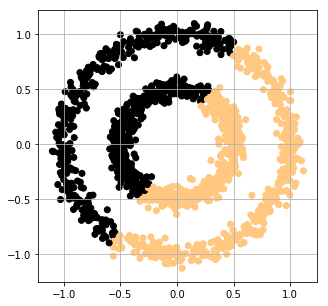

In [76]:
kmeans = KMeans(n_clusters=2).fit(x)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(x[:,0],x[:,1], c=labels, cmap='copper')

**After tuning the spectral clustering using 'gamma', i.e. the width of the non-linear circular classifier, it was identified that the inner and the outer rings could be separated with minimal error.**

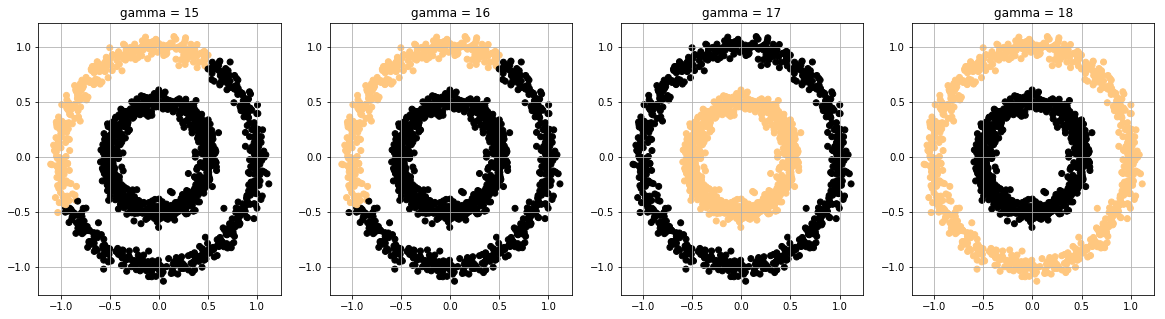

In [77]:
gamma = [15, 16, 17, 18]
n = len(gamma)
plt.figure(figsize=(5*n,5))
i=1
for g in gamma:
    cluster_centers, labels = spectral_clustering(x,2,g)
    plt.subplot(1,n,i)
    plt.gca().set_title("gamma = " + str(g))
    plt.grid()
    plt.scatter(x[:,0],x[:,1], c=labels, cmap='copper')
    i=i+1

* **This puts a stamp on the fact that K-means clustering produces linear decision boundaries.** 
**As a significance, Kmeans clustering can form clusters of data points enclosed in cellular spaces enclosed by linear boundaries described by the Voronoi diagram.**
* **In a dataset like above, it is impossible to separate out the data points, particularly with just k=2 (2 clusters).** 
* **On the other hand, spectral clustering with an optimal width of the circular (non-linear) decision boundary is able to deal with the problem and outperforms Kmeans clustering.**

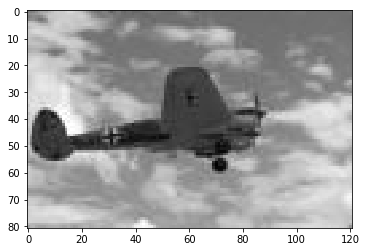

In [80]:
import cv2
image = cv2.imread('data/seg.jpg', 0) 
plt.figure()
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

In [68]:
print(image.shape)

(81, 121)


In [59]:
height, width = image.shape
image1d = image.reshape(height*width, 1)

In [69]:
print(image1d.shape)

(9801, 1)


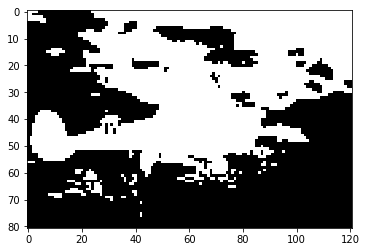

In [72]:
clf = KMeans(n_clusters=2)
clf.fit(image1d)
index = np.copy(clf.labels_)
plt.figure()
plt.imshow(index.reshape(height, width), cmap='gray', vmin=0, vmax=1)

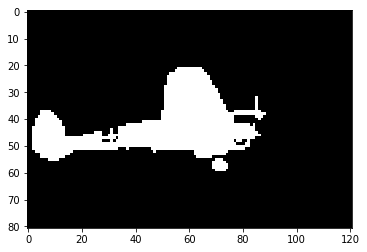

In [71]:
center, index = spectral_clustering(image1d,2,0.1)
plt.figure()
plt.imshow(index.reshape(height, width), cmap='gray', vmin=0, vmax=1)

**The spectral clustering gives us a better image segmentation than Kmeans**

**Thus, we can conclude and justify that *Kmeans* classifies based on the compactness of the data points, whereas *Spectral clustering* uses connectivity.<br>
As we use a tunable (width controlled) Gaussian kernel to decide on the simlarity of the data points, we can control the size of the neighborhood.<br>
As a result to can obtain near to ideal segmentation of data points using Spectral Clustering.